In [31]:
from pathlib import Path

import pandas as pd
import bqplot
import bqplot.pyplot as bqplt
import matplotlib.pyplot as plt
import numpy as np


In [2]:
"""Plot the predicted age versus the chronological age."""
ROOT = Path('/home/okozynet/projects/camcan_analysis')
PREDICTIONS = ROOT / 'data/age_prediction_exp_data.h5'
INFORMATION = ROOT / 'data/participant_data.csv'

camcan_info = pd.read_csv(INFORMATION)

all_predictions = pd.read_hdf(PREDICTIONS, key='predictions')
all_regressions = pd.read_hdf(PREDICTIONS, key='regression')
# Plot errors of predictions from different modalities versus subject's age
keys = all_predictions.columns
# remove column with the original age
keys = keys[1:]

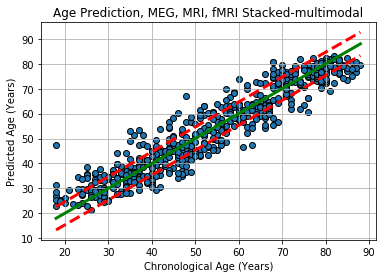

In [3]:
key = keys[-1]

title = f'Age Prediction, {key}'
slice_pred = all_predictions[key].dropna()
y = all_predictions.loc[slice_pred.index].age
y_pred = slice_pred.values
reg_eval = all_regressions.loc[key].values
mae = reg_eval.mean()
plt.close()
plt.figure()
plt.title(title)
plt.scatter(y, y_pred,  edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '-', lw=3, color='green')
plt.plot([y.min(), y.max()], [y.min() - mae, y.max() - mae],
         'k--', lw=3, color='red')
plt.plot([y.min(), y.max()], [y.min() + mae, y.max() + mae],
         'k--', lw=3, color='red')
plt.xlabel('Chronological Age (Years)')
plt.ylabel('Predicted Age (Years)')
plt.grid()
plt.show()

In [7]:
# what else to add
# how to creat an interaction bar with ipywidgets?
# think about interesting interections
# add voila
# how to display legend?

# for interactions I can add a drop down for selecting a key for pringing a figure

# App

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import HTML

plt.ioff()

In [14]:
DATA_URL = 'https://gist.githubusercontent.com/chriddyp/cb5392c35661370d95f300086accea51/raw/8e0768211f6b747c0db42a9ce9a0937dafcbd8b2/indicators.csv'

EXPLANATION = """\
<div class="app-sidebar">
<p><em>Compare different development indicators.</em><p>

<p>Select what indicators to plot in the dropdowns, and use the slider
to sub-select a fraction of years to include in the plot.</p>

<p>Data and idea copied from the <a href="https://dash.plot.ly/getting-started-part-2">
Plotly Dash documentation</a>.</p>

<p>This example demonstrates combining matplotlib with Jupyter widgets. For more interactive plots,
consider using <a href="https://github.com/bloomberg/bqplot">bqplot</a>.
</div>
"""

In [15]:

HTML("""\
<style>
.app-subtitle {
    font-size: 1.5em;
}

.app-subtitle a {
    color: #106ba3;
}

.app-subtitle a:hover {
    text-decoration: underline;
}

.app-sidebar p {
    margin-bottom: 1em;
    line-height: 1.7;
}

.app-sidebar a {
    color: #106ba3;
}

.app-sidebar a:hover {
    text-decoration: underline;
}
</style>
""")

In [77]:
from bqplot import (Axis, Lines, LinearScale, Scatter, Tooltip, Figure)
from IPython.display import display

class App:
    
    def __init__(self, predictions):
        self._df = predictions
        
        available_models = list(all_predictions.columns)
        available_models.remove('age')
        available_models.remove('fold_idx')
#         available_indicators = self._df['Indicator Name'].unique()
        self._x_dropdown = self._create_indicator_dropdown(available_models, 0)
#         self._y_dropdown = self._create_indicator_dropdown(available_indicators, 1)        
        self._plot_container = widgets.Output()
#         self._year_slider, year_slider_box = self._create_year_slider(
#             min(df['Year']), max(df['Year'])
#         )
        _app_container = widgets.VBox([
#             widgets.HBox([self._x_dropdown, self._y_dropdown]),
            self._x_dropdown,
            self._plot_container,
#             year_slider_box
        ], layout=widgets.Layout(align_items='center', flex='3 0 auto'))
        self.container = widgets.VBox([
            widgets.HTML(
                (
                    '<h1>Development indicators</h1>'
                    '<h2 class="app-subtitle"><a href="https://github.com/pbugnion/voila-gallery/blob/master/country-indicators/index.ipynb">Link to code</a></h2>'
                ), 
                layout=widgets.Layout(margin='0 0 5em 0')
            ),
            _app_container
        ], layout=widgets.Layout(flex='1 1 auto', margin='0 auto 0 auto', max_width='1024px'))
        self._update_app()

    def _create_indicator_dropdown(self, indicators, initial_index):
        dropdown = widgets.Dropdown(options=indicators, value=indicators[initial_index])
        dropdown.observe(self._on_change, names=['value'])
        return dropdown
    
    def _create_year_slider(self, min_year, max_year):
        year_slider_label = widgets.Label('Year range: ')
        year_slider = widgets.IntRangeSlider(
            min=min_year, max=max_year,
            layout=widgets.Layout(width='500px')
        )
        year_slider.observe(self._on_change, names=['value'])
        year_slider_box = widgets.HBox([year_slider_label, year_slider])
        return year_slider, year_slider_box
    
#     def _create_plot(self, x_indicator, y_indicator, year_range):
    def _create_plot(self, key):
#         df = self._df[self._df['Year'].between(*year_range)]
#         xs = df[df['Indicator Name'] == x_indicator]['Value']
#         ys = df[df['Indicator Name'] == y_indicator]['Value']
#         plt.figure(figsize=(10, 8))
#         plt.xlabel(x_indicator, size=16)
#         plt.ylabel(y_indicator, size=16)
#         plt.gca().tick_params(axis='both', which='major', labelsize=16)
#         plt.plot(xs, ys, 'o', alpha=0.3)
        
        slice_pred = self._df[key].dropna()
        y = self._df.loc[slice_pred.index].age
        y_pred = slice_pred.values
        mae = np.mean(np.abs((y - y_pred)))
        
        sc_x = LinearScale()
        sc_y = LinearScale()

        # tooltip
        name_tt = Tooltip(fields=['name'], show_labels=False)

        scatt = Scatter(x=y, y=y_pred, marker='circle',
                        unhovered_style={'opacity': 0.5},
                        stroke='black', scales={'x': sc_x, 'y': sc_y},
                        names=self._df.index, display_names=False)
        ax_x = Axis(scale=sc_x, label='Chronological Age (Years)')
        ax_y = Axis(scale=sc_y, orientation='vertical', label='Predicted Age (Years)')


        line_ideal = Lines(x=[y.min(), y.max()], y=[y.min(), y.max()],
                           scales= {'x': sc_x, 'y': sc_y}, colors=['green'],
                           labels=['Ideal Prediciton'])
        line_low = Lines(x=[y.min(), y.max()], y=[y.min() - mae, y.max() - mae],
                         scales= {'x': sc_x, 'y': sc_y}, line_style='dashed', colors=['red'],
                        labels=['Ideal Prediciton - MAE'])
        line_high = Lines(x=[y.min(), y.max()], y=[y.min() + mae, y.max() + mae],
                         scales= {'x': sc_x, 'y': sc_y}, line_style='dashed', colors=['red'],
                         labels=['Ideal Prediciton + MAE'])

        fig_elements = [scatt, line_ideal, line_low, line_high]

        for e in fig_elements:
            e.tooltip = name_tt
        #     e.interactions = {'click': 'tooltip'}


        fig = Figure(marks=[scatt, line_ideal, line_low, line_high], axes=[ax_x, ax_y],
                     animation_duration=100)
        fig.title = title
        
        return fig
#         panzoom = bqplot.interacts.PanZoom(scales={'x': [sc_x], 'y': [sc_y]})
        # PanZoom is better with ScatterGL
        # fig.interaction = panzoom
        # scatter_chart.tooltip = ins
        
    def _on_change(self, _):
        self._update_app()
        
    def _update_app(self):
        x_indicator = self._x_dropdown.value
#         y_indicator = self._y_dropdown.value
#         year_range = self._year_slider.value
        self._plot_container.clear_output(wait=True)
        with self._plot_container:
#             self._create_plot(x_indicator, y_indicator, year_range
            fig = self._create_plot(x_indicator)
            display(fig)

In [78]:
app = App(all_predictions)

app.container